In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import joblib 

In [2]:
# Load the dataset (assumes the CSV has 'review' and 'label' columns)
df = pd.read_csv('Movie.csv')

In [3]:
df

,Id,Review,Sentiment
0,1,സിനിമ എന്ന കലയെ അപമാനിക്കുന്നതാണ് ഈ ചിത്രം. വള...,0
1,2,എന്റെ ജീവിതത്തിലെ ഒരു മണിക്കൂർ ഞാൻ പാഴാക്കിയതി...,0
2,3,"പ്രണയം, ത്യാഗം, ദുരന്തം എന്നിവയുടെ പ്രമേയങ്ങൾ ...",1
3,4,ഓവർ ഓൾ പടം എനിക്ക് ഇഷ്ടായി മേക്കിങ് ഒക്കെ അടിപ...,1
4,5,എന്തിനോ വേണ്ടി തിളച്ച സാമ്പാർ. ആവശ്യമില്ലാത്ത ...,0
...,...,...,...
1795,1796,ഈ സിനിമ എക്കാലത്തെയും മോശമായ ഒന്നായി ഫിഫ്ഡത്തി...,0
1796,1797,കഥ വളഞ്ഞുപുളഞ്ഞ് പ്രേക്ഷക ശ്രദ്ധ പിടിച്ചുപറ്റു...,0
1797,1798,സിന്ദഗി നാ മിലേഗി ദോബാരയ്ക്ക് ചില സമയങ്ങളിൽ അൽ...,1
1798,1799,"അഭിനയം പ്രകടനങ്ങൾ വികാരരഹിതമായിരുന്നു, മാത്രമല...",0


In [4]:
df.head()

,Id,Review,Sentiment
0,1,സിനിമ എന്ന കലയെ അപമാനിക്കുന്നതാണ് ഈ ചിത്രം. വള...,0
1,2,എന്റെ ജീവിതത്തിലെ ഒരു മണിക്കൂർ ഞാൻ പാഴാക്കിയതി...,0
2,3,"പ്രണയം, ത്യാഗം, ദുരന്തം എന്നിവയുടെ പ്രമേയങ്ങൾ ...",1
3,4,ഓവർ ഓൾ പടം എനിക്ക് ഇഷ്ടായി മേക്കിങ് ഒക്കെ അടിപ...,1
4,5,എന്തിനോ വേണ്ടി തിളച്ച സാമ്പാർ. ആവശ്യമില്ലാത്ത ...,0


In [9]:
df.isnull().sum()

Id           0
Review       0
Sentiment    0
dtype: int64

In [10]:
# Splitting the dataset into features (X) and labels (y)
X = df['Review'].values  # Reviews in Malayalam
y = df['Sentiment'].values    # Labels: 0 (negative) and 1 (positive)

In [11]:
# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### TF-IDF Vectorization

In [12]:
# Step 1: Read stop words from the text file
with open('stopwords.txt', 'r', encoding='utf-8') as file:
    stop_words = file.read().splitlines()  # Read lines and remove newline characters
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1997,  # Adjust based on your data size
                                   ngram_range=(1, 2),  # Unigrams and bigrams
                                   stop_words=stop_words)     # list of Malayalam stop words

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data (don't fit again)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

import joblib

# Save the TF-IDF vectorizer
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

In [13]:
print("Number of features in the vectorizer:", tfidf_vectorizer.vocabulary_)
print("Total features:", len(tfidf_vectorizer.vocabulary_))


Number of features in the vectorizer: {'നല': 1074, 'രക': 1464, 'ആണ': 112, 'ഇന': 195, 'നത': 991, 'മലയ': 1345, 'മകൾക': 1275, 'ആവശ': 147, 'അങ': 4, 'ങന': 671, 'ഒര': 371, 'മയ': 1300, 'ഇത': 176, 'ശയ': 1809, 'പറയ': 1192, 'നല രക': 1088, 'ഇന നത': 197, 'അങ ങന': 5, 'ങന ഒര': 672, 'ഒര മയ': 414, 'മയ ഇത': 1304, 'രണ': 1492, 'ഴപ': 1696, 'ഇല': 209, 'ഇഷ': 215, 'ഴപ ഇല': 1697, 'വൽ': 1784, 'മസ': 1349, 'കഥയ': 554, 'അഞ': 8, 'ലർ': 1669, 'ൽപ': 1990, 'ചക': 722, 'ബൻ': 1244, 'എന': 278, 'രത': 1503, 'തന': 858, 'ടപ': 794, 'അഭ': 34, 'നയമ': 1067, 'എല': 320, 'വര': 1725, 'ചവ': 751, 'ഷത': 1847, 'വന': 1713, 'വരവ': 1734, 'അറ': 53, 'കള': 606, 'മര': 1328, 'ഗങ': 657, 'ങള': 673, 'കഥ': 502, 'ഓർമ': 456, 'പടമ': 1144, 'പശ': 1214, 'തല': 900, 'എട': 268, 'ഒന': 364, 'രഹ': 1593, 'കവ': 630, 'കച': 458, 'ചത': 726, 'നല മയ': 1087, 'എന രത': 306, 'അഭ നയമ': 41, 'എല വര': 329, 'ഗങ ങള': 658, 'ഇല കഥ': 212, 'കഥ പറയ': 527, 'പശ തല': 1215, 'എട പറയ': 270, 'പറയ ഒന': 1193, 'രത കച': 1509, 'കച ചത': 462, 'രവ': 1568, 'ലള': 1660, 'തവ': 910, 'പര': 1167, 'വളര': 

In [14]:
print("Shape of the training data:", X_train_tfidf.shape)



Shape of the training data: (1440, 1997)


In [14]:
# Step 3: P the stop words
print("Stop words rintlist:", stop_words)

Stop words rintlist: ['എന്ന', 'ആണ്', 'എന്ന്', 'ഒരു', 'ഈ', 'അത', 'കൂടി', 'അതും', 'ഉള്ള', 'വരെ', 'ആയിരുന്നു', 'ആയിരിക്കും', 'ഇങ്ങിനെ', 'അങ്ങനെ', 'എങ്കിലും', 'എന്താണ്', 'എവിടെ', 'ആരാണ്', 'എന്ത്', 'ആ', 'അല്ല', 'എന്നും', 'ഇതിനായി', 'മാത്രമല്ല', 'ഉണ്ടോ', 'വളരെ', 'ഇത്', 'തന്റെ', 'തന്നെ', 'പക്ഷേ', 'എല്ലാം', 'കൊണ്ട്', 'ആയി', 'ആയ']


In [15]:
# Assuming X_train contains your original reviews and X_train_tfidf contains the corresponding vectors

# Step 1: Loop through the first 5 reviews
for review_index in range(5):
    # Print the review
    print(f"Review {review_index + 1}: {X_train[review_index]}")
    
    # Print the corresponding TF-IDF vector
    tfidf_vector = X_train_tfidf[review_index].toarray()  # Convert the sparse vector to a dense array
    print(f"TF-IDF Vector {review_index + 1}:\n", tfidf_vector)
    print("\n" + "-"*80 + "\n")  # Add a separator between reviews for clarity

# Step 2: (Optional) To print with feature names, you can use a Pandas DataFrame for better visualization
import pandas as pd

# Get feature names from the vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# Loop to print DataFrames for the first 5 reviews
for review_index in range(5):
    tfidf_vector = X_train_tfidf[review_index].toarray()  # Convert the sparse vector to a dense array
    df = pd.DataFrame(tfidf_vector, columns=feature_names)
    print(f"TF-IDF Vector with Features for Review {review_index + 1}:\n", df)
    print("\n" + "="*80 + "\n")  # Add a separator between reviews


Review 1: നല്ല തിരക്കഥൾ ആണ് ഇന്നത്തെ മലയാളം സിനിമകൾക്ക് ആവശ്യം. അങ്ങനെ ഒരു സിനിമയാണ് ഇതെന്ന് നിസംശയം പറയാം. നല്ലൊരു കൊച്ചു ചിത്രം.
TF-IDF Vector 1:
 [[0. 0. 0. ... 0. 0. 0.]]

--------------------------------------------------------------------------------

Review 2: രണ്ട് സോങ്ങും പൊളിയാണ് തീം കുഴപ്പം ഇല്ലായിരുന്നു ഫാമിലിക്ക് ഇഷ്ട്ട പെടും
TF-IDF Vector 2:
 [[0. 0. 0. ... 0. 0. 0.]]

--------------------------------------------------------------------------------

Review 3: മിഥുൻ മാനുവൽ തോമസ് കഥയെഴുതി സംവിധാനം ചെയ്ത അഞ്ചാം പാതിര ക്രൈം ത്രില്ലർ ഗണത്തിൽപ്പെടുന്ന നല്ലൊരു സിനിമയാണ്. കുഞ്ചക്കോ ബോബൻ എന്ന താരത്തോടൊപ്പം തന്ന കിടപിടിക്കാവുന്ന അഭിനയമാണ് എല്ലാവരും കാഴ്ചവെച്ചിരിക്കുന്നത്. ഇന്ദ്രൻസ് ചെറിയ വേഷത്തിലൂടെ വന്ന് തിരിച്ചു വരവ് അറിയിച്ചു. പാട്ടുകളോ പ്രേമരംഗങ്ങളോ ഇല്ലാതെയും കഥ പറയാം എന്നു ഓർമ്മിപ്പിച്ച ഒരു പടമാണ്. സുഷിൻ ശ്യാമിന്റെ പശ്ചാത്തല സംഗീതം എടുത്തു പറയേണ്ട ഒന്നാണ്. ഷൈജു ഖാലിദിന്റെ ഛായാഗ്രഹ മികവ് ചിത്രത്തെ മികച്ചതാക്കി.
TF-IDF Vector 3:
 [[0. 0. 0. ... 0. 0. 0.]]

---------------------

###### Tokenized review


In [16]:
import pandas as pd

# Assuming X_train is a list/Series of raw review texts
df_train = pd.DataFrame(X_train, columns=['Review'])

# Function to extract tokens and their corresponding vectors
def get_tokens_and_vector_from_tfidf(i, tfidf_matrix, feature_names):
    vector = tfidf_matrix[i]  # Sparse matrix row for review i
    tokens = [feature_names[idx] for idx in vector.nonzero()[1]]  # Get the tokens from non-zero indices
    vector_values = vector.data  # Get the actual tf-idf values
    return tokens, vector_values

# Get the feature names from the TF-IDF vectorizer
tokens = tfidf_vectorizer.get_feature_names_out()

# Apply the function to each review and create a new column with tokens and vectors
df_train['tokens_and_vector'] = [get_tokens_and_vector_from_tfidf(i, X_train_tfidf, tokens) for i in range(X_train_tfidf.shape[0])]

# Separate the tokens and vectors into two columns
df_train['tokens'] = df_train['tokens_and_vector'].apply(lambda x: x[0])
df_train['vectors'] = df_train['tokens_and_vector'].apply(lambda x: x[1])

# Drop the temporary 'tokens_and_vector' column if not needed anymore
df_train = df_train.drop(columns=['tokens_and_vector'])

# Display the DataFrame with tokens and vectors
df_train.head()


,Review,tokens,vectors
0,നല്ല തിരക്കഥൾ ആണ് ഇന്നത്തെ മലയാളം സിനിമകൾക്ക് ...,"[നല, രക, ആണ, ഇന, നത, മലയ, മകൾക, ആവശ, അങ, ങന, ഒ...","[0.2582866941486502, 0.1005250543255707, 0.161..."
1,രണ്ട് സോങ്ങും പൊളിയാണ് തീം കുഴപ്പം ഇല്ലായിരുന്...,"[രണ, ഴപ, ഇല, ഇഷ, ഴപ ഇല]","[0.3441594821272819, 0.40200722513322845, 0.33..."
2,മിഥുൻ മാനുവൽ തോമസ് കഥയെഴുതി സംവിധാനം ചെയ്ത അഞ്...,"[നല, ഇന, നത, ഒര, മയ, പറയ, ഇല, വൽ, മസ, കഥയ, അഞ,...","[0.07849934158214997, 0.11094545068159546, 0.0..."
3,"കഥ വിചിത്രവും ലളിതവുമാണ്, എല്ലാറ്റിനുമുപരിയായി...","[നല, ഇത, രണ, കഥയ, എന, എല, കഥ, രവ, ലള, തവ, പര, ...","[0.08870861078916205, 0.08663119280346268, 0.1..."
4,"സംവിധാനം ക്രിയാത്മകമായിരുന്നു, പക്ഷേ തിരക്കഥ പ...","[രക, എന, കഥ, തമ, പക, കര, മകമ, രവചന, ഭയങ, പക രക...","[0.11746957249634324, 0.11438403106958488, 0.0..."


In [17]:
# Assuming df_train['tokens'] contains the tokenized words for each review

# Get the total number of tokens across all reviews
total_tokens = df_train['tokens'].apply(len).sum()

# Display the total number of tokens
print(f"Total number of tokens generated: {total_tokens}")


Total number of tokens generated: 43651


### Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)

# Train the model
lr_model.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred_lr = lr_model.predict(X_test_tfidf)

# Evaluate the model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.7972222222222223
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.79      0.78       163
           1       0.82      0.81      0.81       197

    accuracy                           0.80       360
   macro avg       0.80      0.80      0.80       360
weighted avg       0.80      0.80      0.80       360



##### Tuning

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Define the parameter grid for Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],      # Inverse of regularization strength
    'solver': ['liblinear', 'saga'],    # Different solvers for optimization
    'penalty': ['l1', 'l2'],            # Type of regularization (L1 or L2)
    'max_iter': [500, 1000, 2000]       # Maximum number of iterations
}

# Initialize Logistic Regression model
lr_model = LogisticRegression()

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(lr_model, param_grid, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train_tfidf, y_train)

# Get the best hyperparameters and best model
best_lr_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

# Predict on the test set using the best model
y_pred_lr_tuned = best_lr_model.predict(X_test_tfidf)

# Evaluate the tuned model
print("Tuned Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr_tuned))
print("Classification Report:\n", classification_report(y_test, y_pred_lr_tuned))


Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best Parameters: {'C': 10, 'max_iter': 500, 'penalty': 'l2', 'solver': 'saga'}
Tuned Logistic Regression Accuracy: 0.8083333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.79      0.79       163
           1       0.83      0.82      0.82       197

    accuracy                           0.81       360
   macro avg       0.81      0.81      0.81       360
weighted avg       0.81      0.81      0.81       360



### Random forest

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model on the training data
rf_model.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test_tfidf)

# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.8027777777777778
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.78      0.78       163
           1       0.82      0.82      0.82       197

    accuracy                           0.80       360
   macro avg       0.80      0.80      0.80       360
weighted avg       0.80      0.80      0.80       360



##### Tuning

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200, 300],            # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],                # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],                # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],                  # Minimum number of samples required in a leaf node
    'max_features': ['auto', 'sqrt'],               # Number of features to consider for the best split
    'bootstrap': [True, False]                      # Whether to use bootstrapping
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Perform Grid Search with 5-fold cross-validation
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, 
                              cv=5, n_jobs=-1, verbose=2)

# Fit the GridSearch to the training data
grid_search_rf.fit(X_train_tfidf, y_train)

# Get the best hyperparameters
print(f"Best Hyperparameters: {grid_search_rf.best_params_}")

# Use the best model for prediction
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf_tuned = best_rf_model.predict(X_test_tfidf)

# Evaluate the tuned model
print("Tuned Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf_tuned))
print("Classification Report:\n", classification_report(y_test, y_pred_rf_tuned))


Fitting 5 folds for each of 576 candidates, totalling 2880 fits
Best Hyperparameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Tuned Random Forest Accuracy: 0.8083333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.75      0.78       163
           1       0.81      0.85      0.83       197

    accuracy                           0.81       360
   macro avg       0.81      0.80      0.81       360
weighted avg       0.81      0.81      0.81       360



### Naive bayes

In [22]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Multinomial Naive Bayes model
nb_model = MultinomialNB()

# Train the model on the training data
nb_model.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred_nb = nb_model.predict(X_test_tfidf)

# Evaluate the model
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.7972222222222223
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.71      0.76       163
           1       0.78      0.87      0.82       197

    accuracy                           0.80       360
   macro avg       0.80      0.79      0.79       360
weighted avg       0.80      0.80      0.80       360



##### Tuning

In [25]:
#hyperparameter tuning
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Define the parameter grid for Naive Bayes
param_grid_nb = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 2.0]  # Smoothing parameter
}

# Initialize the Naive Bayes model
nb_model = MultinomialNB()

# Perform Grid Search with 5-fold cross-validation
grid_search_nb = GridSearchCV(estimator=nb_model, param_grid=param_grid_nb, 
                              cv=5, n_jobs=-1, verbose=2)

# Fit the GridSearch to the training data
grid_search_nb.fit(X_train_tfidf, y_train)

# Get the best hyperparameters
print(f"Best Hyperparameters: {grid_search_nb.best_params_}")

# Use the best model for prediction
best_nb_model = grid_search_nb.best_estimator_
y_pred_nb_tuned = best_nb_model.predict(X_test_tfidf)

# Evaluate the tuned model
print("Tuned Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb_tuned))
print("Classification Report:\n", classification_report(y_test, y_pred_nb_tuned))


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Hyperparameters: {'alpha': 0.5}
Tuned Naive Bayes Accuracy: 0.8
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.72      0.76       163
           1       0.79      0.87      0.83       197

    accuracy                           0.80       360
   macro avg       0.80      0.79      0.80       360
weighted avg       0.80      0.80      0.80       360



### Support vector machine

In [26]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize the SVM model with a linear kernel
svm_model = SVC(kernel='linear', random_state=42)

# Train the model on the training data
svm_model.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test_tfidf)

# Evaluate the model
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.8194444444444444
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.81      0.80       163
           1       0.84      0.83      0.83       197

    accuracy                           0.82       360
   macro avg       0.82      0.82      0.82       360
weighted avg       0.82      0.82      0.82       360



In [22]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Define the parameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100, 1000],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.1, 1, 10],
    'degree': [2, 3, 4],  # Only relevant for poly kernel
    'class_weight': [None, 'balanced']
}

# Initialize the SVM model
svm_model = SVC(random_state=42)

# Perform Grid Search with 5-fold cross-validation
grid_search_svm = GridSearchCV(estimator=svm_model, param_grid=param_grid_svm, 
                               cv=5, n_jobs=-1, verbose=2)

# Fit the GridSearch to the training data
grid_search_svm.fit(X_train_tfidf, y_train)

# Get the best hyperparameters
print(f"Best Hyperparameters: {grid_search_svm.best_params_}")

# Use the best model for prediction
best_svm_model = grid_search_svm.best_estimator_
y_pred_svm_tuned = best_svm_model.predict(X_test_tfidf)

# Evaluate the tuned model
print("Tuned SVM Accuracy:", accuracy_score(y_test, y_pred_svm_tuned))
print("Classification Report:\n", classification_report(y_test, y_pred_svm_tuned))
# Save the model
joblib.dump(best_svm_model, 'best_svm_model.pkl')

Fitting 5 folds for each of 600 candidates, totalling 3000 fits
Best Hyperparameters: {'C': 100, 'class_weight': None, 'degree': 2, 'gamma': 1, 'kernel': 'rbf'}
Tuned SVM Accuracy: 0.8222222222222222
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.79      0.80       163
           1       0.83      0.85      0.84       197

    accuracy                           0.82       360
   macro avg       0.82      0.82      0.82       360
weighted avg       0.82      0.82      0.82       360



['best_svm_model.pkl']

### Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
dt_model.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred_dt = dt_model.predict(X_test_tfidf)

# Evaluate the model
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.6888888888888889
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.64      0.65       163
           1       0.71      0.73      0.72       197

    accuracy                           0.69       360
   macro avg       0.69      0.68      0.69       360
weighted avg       0.69      0.69      0.69       360



In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Define the parameter grid for Decision Tree
param_grid_dt = {
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'max_features': [None, 'sqrt', 'log2']
}

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Perform Randomized Search with 5-fold cross-validation
random_search_dt = RandomizedSearchCV(estimator=dt_model, param_distributions=param_grid_dt, 
                                      n_iter=50, cv=5, n_jobs=-1, verbose=2, random_state=42)
random_search_dt.fit(X_train_tfidf, y_train)

# Get the best hyperparameters from Randomized Search
print(f"Best Hyperparameters from Randomized Search: {random_search_dt.best_params_}")

# Use the best model for prediction
best_dt_model_random = random_search_dt.best_estimator_
y_pred_dt_random = best_dt_model_random.predict(X_test_tfidf)

# Evaluate the tuned model
print("Tuned Decision Tree Accuracy (Randomized Search):", accuracy_score(y_test, y_pred_dt_random))
print("Classification Report:\n", classification_report(y_test, y_pred_dt_random))

# Perform Grid Search with 5-fold cross-validation
grid_search_dt = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt, 
                              cv=5, n_jobs=-1, verbose=2)
# Fit the GridSearch to the training data
grid_search_dt.fit(X_train_tfidf, y_train)

# Get the best hyperparameters from Grid Search
print(f"Best Hyperparameters from Grid Search: {grid_search_dt.best_params_}")

# Use the best model for prediction
best_dt_model_grid = grid_search_dt.best_estimator_
y_pred_dt_grid = best_dt_model_grid.predict(X_test_tfidf)

# Evaluate the tuned model
print("Tuned Decision Tree Accuracy (Grid Search):", accuracy_score(y_test, y_pred_dt_grid))
print("Classification Report:\n", classification_report(y_test, y_pred_dt_grid))


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters from Randomized Search: {'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 30, 'criterion': 'gini'}
Tuned Decision Tree Accuracy (Randomized Search): 0.6861111111111111
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.67      0.66       163
           1       0.72      0.70      0.71       197

    accuracy                           0.69       360
   macro avg       0.68      0.68      0.68       360
weighted avg       0.69      0.69      0.69       360

Fitting 5 folds for each of 270 candidates, totalling 1350 fits
Best Hyperparameters from Grid Search: {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Tuned Decision Tree Accuracy (Grid Search): 0.6888888888888889
Classification Report:
               precision    recall  f1-score   support

          

### K Nearest Neighbour

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the KNN model
knn_model = KNeighborsClassifier()

# Train the model on the training data
knn_model.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred_knn = knn_model.predict(X_test_tfidf)

# Evaluate the model
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.7444444444444445
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.72      0.72       163
           1       0.77      0.77      0.77       197

    accuracy                           0.74       360
   macro avg       0.74      0.74      0.74       360
weighted avg       0.74      0.74      0.74       360



In [29]:
#Hyper parameter tuned

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

param_grid_knn = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 15],
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
    'leaf_size': [10, 20, 30, 40]         # Controls the speed vs. accuracy tradeoff
}


# Initialize the KNN model
knn_model = KNeighborsClassifier()

# Perform Grid Search with 5-fold cross-validation
grid_search_knn = GridSearchCV(estimator=knn_model, param_grid=param_grid_knn, 
                               cv=5, n_jobs=-1, verbose=2)

# Fit the GridSearch to the training data
grid_search_knn.fit(X_train_tfidf, y_train)

# Get the best hyperparameters
print(f"Best Hyperparameters: {grid_search_knn.best_params_}")

# Use the best model for prediction
best_knn_model = grid_search_knn.best_estimator_
y_pred_knn_tuned = best_knn_model.predict(X_test_tfidf)

# Evaluate the tuned model
print("Tuned KNN Accuracy:", accuracy_score(y_test, y_pred_knn_tuned))
print("Classification Report:\n", classification_report(y_test, y_pred_knn_tuned))



Fitting 5 folds for each of 112 candidates, totalling 560 fits
Best Hyperparameters: {'leaf_size': 10, 'n_neighbors': 11, 'p': 2, 'weights': 'distance'}
Tuned KNN Accuracy: 0.7833333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.76      0.76       163
           1       0.80      0.80      0.80       197

    accuracy                           0.78       360
   macro avg       0.78      0.78      0.78       360
weighted avg       0.78      0.78      0.78       360



##### loading the SVM model for prediction

In [30]:
import joblib

# Load the vectorizer and model
loaded_vectorizer = joblib.load('tfidf_vectorizer.pkl')
loaded_model = joblib.load('best_svm_model.pkl')

# Example new review
new_review = "ഈ സിനിമയുടെ അഭിനയവും കഥയും അത്യന്തം മനോഹരമായാണ്, പ്രേക്ഷകരെ വിസ്മയിപ്പിക്കുന്നതിൽ വിജയിച്ചു"
# Transform the new review using the loaded vectorizer
new_review_tfidf = loaded_vectorizer.transform([new_review])

# Make prediction
prediction = loaded_model.predict(new_review_tfidf)

# Print the predicted sentiment
if prediction[0] == 1:
    sentiment = "Positive"
else:
    sentiment = "Negative"

# Print the predicted sentiment
print("Predicted sentiment:", sentiment)


Predicted sentiment: Positive


Confusion Matrix:
 [[128  35]
 [ 29 168]]


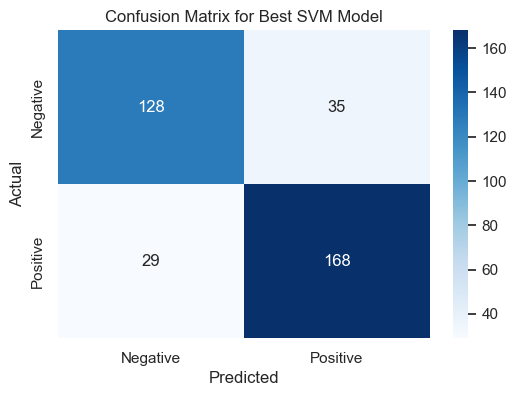

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# After fitting the model and making predictions
y_pred_svm_tuned = best_svm_model.predict(X_test_tfidf)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_svm_tuned)

# Print the confusion matrix
print("Confusion Matrix:\n", cm)

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Best SVM Model')
plt.show()


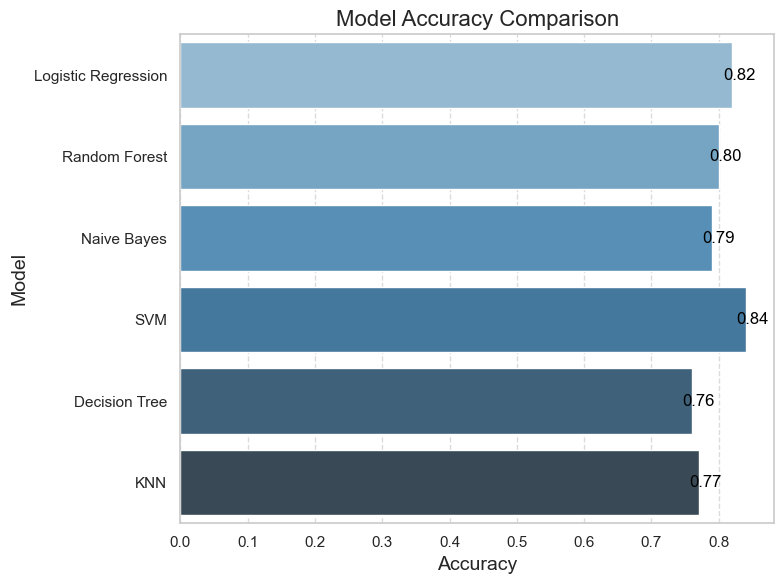

In [24]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame with your models and their accuracies
data = {
    'Model': [
        'Logistic Regression',
        'Random Forest',
        'Naive Bayes',
        'SVM',
        'Decision Tree',
        'KNN',
    ],
    'Accuracy': [
        0.82,  # Logistic Regression
        0.80,  # Random Forest
        0.79,  # Naive Bayes
        0.84,  # SVM
        0.76,  # Decision Tree
        0.77,  # KNN
    ]
}

df = pd.DataFrame(data)

# Set the style
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(x='Accuracy', y='Model', data=df, palette='Blues_d')

# Add data labels on top of the bars
for index, value in enumerate(df['Accuracy']):
    bar_plot.text(value + 0.01, index, f"{value:.2f}", color='black', ha='center', va='center')

# Set labels and title with larger font sizes
plt.xlabel('Accuracy', fontsize=14)
plt.ylabel('Model', fontsize=14)
plt.title('Model Accuracy Comparison', fontsize=16)

# Add a grid for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()


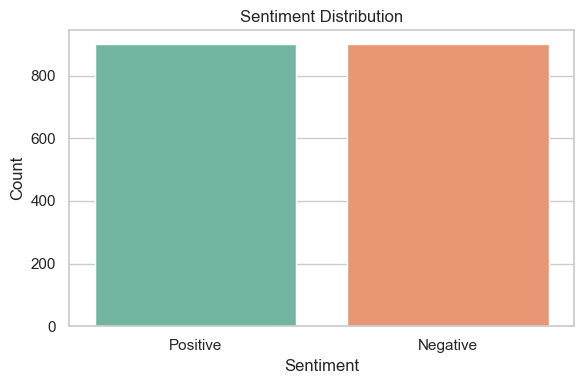

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example data for sentiment
data = {
    'Sentiment': ['Positive'] * 900 + ['Negative'] * 900
}

# Create DataFrame
df_sentiment = pd.DataFrame(data)

# Set the style and size of the plot
sns.set(style="whitegrid")

# Create a count plot for sentiment distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Sentiment', data=df_sentiment, palette='Set2')

# Set labels and title
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')

# Show the plot
plt.tight_layout()
plt.show()
